## Factorial

The act of multiplying numbers in successive order. 

### Why would you do such a thing? 

This operation comes up very often in counting outcomes which can help you estimate probabilities of something happening.

For example, how many different orders will I get if I pull all 52 cards in a deck?

Well first I can expect any 52 of the cards, and next pull there are 51 cards left, and so on

$$52 \times 51 \times 50 \times \dots \times 1 = $$

In [1]:
52*51*50*49*48*47*46*45*44*43*42*41*40*39*38*37*36*35*34*33*32*31*30*29*28*27*26*25*24*23*22*21*20*19*18*17*16*15*14*13*12*11*10*9*8*7*6*5*4*3*2*1

80658175170943878571660636856403766975289505440883277824000000000000

### How do you compute it?

For example, factorial of 5 is 1 times 2 times 3 times 4 times 5 which totals to 120.

In [2]:
1*2*3*4*5

120

Generally speaking, this is the same as $5 \cdot \text{factorial}(4)$ and $\text{factorial}(4)$ is just $4\cdot\text{factorial}(3)$ and so on. So we can recursively call factorial for example:

$5 \cdot \text{factorial}(4)$ -> 

$5 \cdot [4 \cdot \text{factorial}(3)]$ -> 

$5 \cdot [4 \cdot [3 \cdot \text{factorial}(2)]]$ -> 

$5 \cdot [4 \cdot [3 \cdot [2 \cdot \text{factorial}(1)]]]$ -> 

$5 \cdot 4 \cdot 3 \cdot 2 \cdot 1 = 120$

Like

In [3]:
def factorial(n):
	return 1 if n<=1 else n*factorial(n-1)

print(f"{factorial(3)=}")
print(f"{factorial(5)=}")
print(f"{factorial(7)=}")

factorial(3)=6
factorial(5)=120
factorial(7)=5040


Alternatively, you can just iteratively compute factorials by multiplying the list of increasing numbers

In [4]:
def factorial_builtin(n):
	res = 1
	for i in range(1, n+1):
		res *= i
	return res

print(f"{factorial_builtin(3)=}")
print(f"{factorial_builtin(5)=}")
print(f"{factorial_builtin(7)=}")

factorial_builtin(3)=6
factorial_builtin(5)=120
factorial_builtin(7)=5040


Even more concisely as 

In [5]:
import math
factorial_concise = lambda n: math.prod(range(1,n+1))
factorial_concise(5)

120

Or if you need to computes many factorials, you might consider caching the intermediate results

In [6]:
def gen_factorial_cached():
	cache = {}
	def factorial(n):
		if n not in cache:
			cache[n] = 1 if n<=1 else n*factorial(n-1)
		return cache[n]
	return factorial

factorial_cached = gen_factorial_cached()

print(f"{factorial_cached(3)=}")
print(f"{factorial_cached(5)=}")
print(f"{factorial_cached(7)=}")

factorial_cached(3)=6
factorial_cached(5)=120
factorial_cached(7)=5040


Or you the built in `functools` library

In [7]:
import functools

@functools.lru_cache(maxsize=128)
def factorial_functools_cached(n):
	return 1 if n<=1 else n*factorial_functools_cached(n-1)

print(f"{factorial_functools_cached(3)=}")
print(f"{factorial_functools_cached(5)=}")
print(f"{factorial_functools_cached(7)=}")

factorial_functools_cached(3)=6
factorial_functools_cached(5)=120
factorial_functools_cached(7)=5040


### What about large numbers?

Computing factorial for very large numbers gets terrible quickly.

For example factorial of 100 requires many large multiplications -> 100 * 99 * 98 ... which very quickly gets massive

In [8]:
factorial(100)

93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

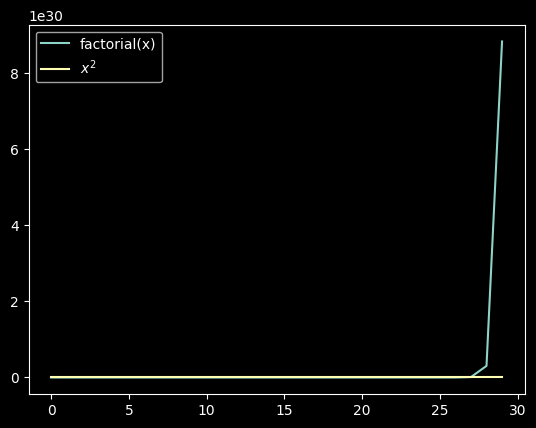

In [10]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')


xs = range(30)
plt.plot(xs, [factorial(x) for x in xs], label="factorial(x)")
plt.plot(xs, [x**2 for x in xs], label="$x^2$")
plt.legend()

SO for large numbers you probably want to find the number precomputed, use symbolic languages, or use [approximations](https://www.wikiwand.com/en/articles/Stirling%27s_approximation).